# Pandas Practice on Bike Share Data

As a data scientist, you don't always have to invent the wheel from scratch. The great advantage of Python is that smart people before you spend a lot of energy on making life easier for the next programers. So please, make your life easier and use code that has already been implemented, don't call it "copying" but "friendly borrowing" of other people's code. If you copy whole functions or great graphs in the future, don't forget to give props to the inventor!

So for this exercise, too, if you get stuck at any point, look at good solutions from others and learn a lot from them about how to solve these problems even better.
Here are two good resources for small code snippet which can be very helpful when dealing with DataFrames:

- [Sebastian Raschkas "Things in Pandas I Wish I'd Known Earlier"](https://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb)
- [Chris Albons set of code snippets](https://chrisalbon.com/)


**By the end of this session you should be able to**
- Explore data with Pandas to answer conceptual questions
- Write chained commands for effecient one-liners



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/bike_share_201402_trip_data.csv')
df.head(2)

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138


How many observations are there?

In [3]:
df.shape

(144015, 11)

Change the columns to be Pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 


In [4]:
# Rename column names with list comprehension
columns = df.columns.tolist()
columns_pythonic = [x.lower().replace(' ', '_').replace('#', 'num') for x in columns]
df.columns = columns_pythonic

In [5]:
# Rename columns with lambda function 
#df.rename(columns=lambda x: x.lower().replace(' ', '_').replace('#', 'num'), inplace=True)

In [6]:
df.head(2)

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138


How many types of subscription options are there? What are the different subscription types?

In [7]:
df.subscription_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

What is the frequency of each subscription option?

In [8]:
df.subscription_type.value_counts()

Subscriber    113647
Customer       30368
Name: subscription_type, dtype: int64

Please plot the frequency of each subscription option with a pie chart:

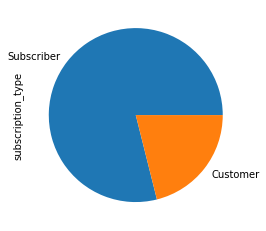

In [9]:
df.subscription_type.value_counts().plot(kind='pie');

Please plot the frequency of each subscription option with a bar chart:

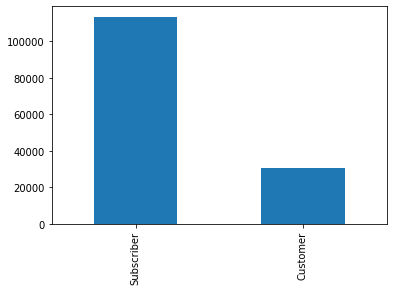

In [10]:
df.subscription_type.value_counts().plot(kind='bar');

Have a look at the start_station column: Which 10 stations occur most frequently?

In [11]:
df.start_station.value_counts()[:10]

San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
Market at 4th                                    5030
2nd at Townsend                                  4987
San Francisco Caltrain 2 (330 Townsend)          4976
Steuart at Market                                4913
Townsend at 7th                                  4493
Name: start_station, dtype: int64

Now look at the end_station column: Which 10 stations occur the least?

In [12]:
df.end_station.value_counts(ascending=True)[:10]

Mezes Park                            5
San Jose Government Center           23
Broadway at Main                     56
Franklin at Maple                    93
San Antonio Shopping Center          93
San Mateo County Center             106
Redwood City Public Library         117
Castro Street and El Camino Real    129
Redwood City Medical Center         178
Broadway St at Battery St           205
Name: end_station, dtype: int64

Create a table that has start_station segmented by subscription_type.

Include the marginals.

<details><summary>
Click here for a hint…
</summary>
`pd.crosstab`
</details>

In [13]:
pd.crosstab(df.start_station, df.subscription_type)

subscription_type,Customer,Subscriber
start_station,,
2nd at Folsom,427,3349
2nd at South Park,535,3923
2nd at Townsend,882,4105
5th at Howard,606,2029
Adobe on Almaden,75,260
...,...,...
Temporary Transbay Terminal (Howard at Beale),427,4686
Townsend at 7th,518,3975
University and Emerson,328,106



Let's look at duration… Which unit do you think is used here?
    
* The duration seems to be given in seconds.

How long is the shortest trip? How many are that short?

In [14]:
df.duration.min()

60

In [15]:
df[df.duration == 60].shape

(17, 11)

* There are 17 trips with the minimun duration of 1 min.

What do you think is going on with the short trips?

* Maybe after unlocking the bikes were immediately locked again and the minimum duration of borrowing is 1 min.

What is the longest trip?

In [16]:
df.duration.sort_values(ascending=False)[:1]

80510    722236
Name: duration, dtype: int64

How would you define a "long" trip? How many trips are "long" according to your definition?

* My definition: every trip longer than a day/24h (more than 86400 s)
+ (It's also possible to define long according to percentiles...feel free to come up with your own definition)

In [17]:
# How many seconds are one day?
24 * 60 * 60

86400

In [18]:
# Trips longer than a day
df[df.duration > 86400].shape

(82, 11)

* There are 82 trips that took longer than 1 day and are therefore "long" according to my definition. 

Do the long durations seem reasonable? Why are they so long? What could it tell us about the users?

Plot the duration column.

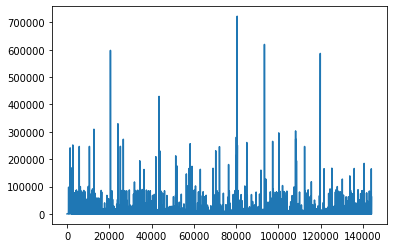

In [19]:
df.duration.plot();

Does this plot give any insights?

* Not really.

Select subsections of the data to make plots that provide more insights.

The Product Team would like all of the station names to be lower case and  with `_` as a seperator

`South Van Ness at Market` -> `south_van_ness_at_market`  

__DO NOT USE A FOR LOOP. THEY ARE THE 👿__

In [20]:
# two ways without for loops (if you want, check out what's the fastest way :) )
df["start_station"] = df["start_station"].str.lower().str.replace(" ", "_")
df["end_station"] = df["end_station"].apply(lambda x: x.lower().replace(" ", "_"))

In [21]:
# list comprehension solution
start_station_list = df.start_station.tolist()
start_station_new = [x.lower().replace(' ', '_') for x in start_station_list]
df['start_station'] = start_station_new

end_station_list = df.end_station.tolist()
end_station_new = [x.lower().replace(' ', '_') for x in end_station_list]
df['end_station'] = end_station_new

In [22]:
df.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,south_van_ness_at_market,66,8/29/2013 14:14,south_van_ness_at_market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,san_jose_city_hall,10,8/29/2013 14:43,san_jose_city_hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,mountain_view_city_hall,27,8/29/2013 10:17,mountain_view_city_hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,san_jose_city_hall,10,8/29/2013 11:30,san_jose_city_hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,south_van_ness_at_market,66,8/29/2013 12:04,market_at_10th,67,319,Subscriber,94103


Now take a timer and set it to 15 minutes. Take this time to explore the data guided by your own intuition or hypotheses…
> Timeboxing is a helpful approach when working with a new dataset so you won't fall into any rabbit holes. 